[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Dataset shape: (31962, 3)
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.33      0.48       456

    accuracy                           0.95      6393
   macro avg       0.94      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393

Accuracy: 0.9501016737056155

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accura

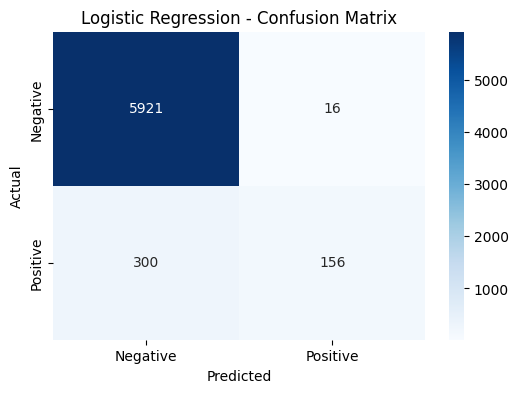

Top Positive Words: [('user', 1862), ('amp', 283), ('trump', 216), ('white', 153), ('libtard', 149), ('black', 146), ('like', 140), ('woman', 114), ('racist', 109), ('politics', 97), ('people', 95), ('liberal', 92), ('allahsoil', 92), ('u', 89), ('might', 77)]
Top Negative Words: [('user', 15638), ('day', 2794), ('love', 2745), ('happy', 1679), ('u', 1578), ('amp', 1324), ('life', 1220), ('time', 1205), ('im', 1112), ('today', 1068), ('get', 949), ('like', 948), ('positive', 932), ('thankful', 925), ('father', 919)]


In [1]:
# ============================
# TASK 4 - SENTIMENT ANALYSIS
# Twitter Sentiment Analysis using NLP + ML
# ============================

# Install dependencies if not installed
# !pip install nltk scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# 1. Load Dataset
# Sample Twitter Sentiment dataset from Kaggle (small demo version here)
data_url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(data_url)

print("Dataset shape:", df.shape)
print(df.head())

# The dataset has 'label' (0 = Negative, 1 = Positive) and 'tweet'

# 2. Preprocessing Function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                               # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)        # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)              # remove punctuation/numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_tweet"] = df["tweet"].astype(str).apply(clean_text)

# 3. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_tweet"])
y = df["label"]

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Models
# a) Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# b) Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 6. Evaluation
print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Insights - Most frequent positive & negative words
positive_tweets = " ".join(df[df["label"]==1]["clean_tweet"])
negative_tweets = " ".join(df[df["label"]==0]["clean_tweet"])

from collections import Counter
pos_words = Counter(positive_tweets.split()).most_common(15)
neg_words = Counter(negative_tweets.split()).most_common(15)

print("Top Positive Words:", pos_words)
print("Top Negative Words:", neg_words)
